# Setup

In [3]:
import sys
assert sys.version_info >= (3, 5)

In [4]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [2]:
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [5]:
np.random.seed(42)

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [8]:
PROJECT_ROOT_DIR = '.'
CHAPTER_ID = 'classification'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [9]:
def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
  print('Saving figure', fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [10]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [11]:
X, y = mnist['data'], mnist['target']
X.shape

(70000, 784)

In [12]:
y.shape

(70000,)

In [13]:
28 * 28

784

Saving figure some_digit_plot


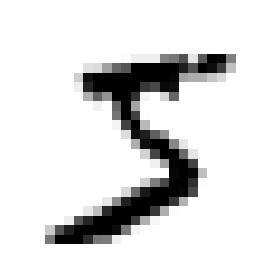

In [14]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis('off')

save_fig('some_digit_plot')
plt.show()

In [14]:
y[0]

'5'

In [21]:
y = y.astype(np.uint8)

In [15]:
def plot_digit(data):
  image = data.reshape(28, 28)
  plt.imshow(image, cmap=mpl.cm.binary, interpolation='nearest')
  plt.axis('off')

In [16]:
def plot_digits(instances, images_per_row=10, **options):
  size = 28
  images_per_row = min(len(instances), images_per_row)
  images = [instance.reshape(size, size) for instance in instances]
  n_rows = (len(instances) - 1) // images_per_row + 1
  row_images = []
  n_empty = n_rows * images_per_row - len(instances)
  images.append(np.zeros((size, size * n_empty)))
  for row in range(n_rows):
    rimages = images[row * images_per_row : (row + 1) * images_per_row]
    row_images.append(np.concatenate(rimages, axis=1))
  image = np.concatenate(row_images, axis=0)
  plt.imshow(image, cmap=mpl.cm.binary, **options)
  plt.axis('off')

Saving figure more_digits_plot


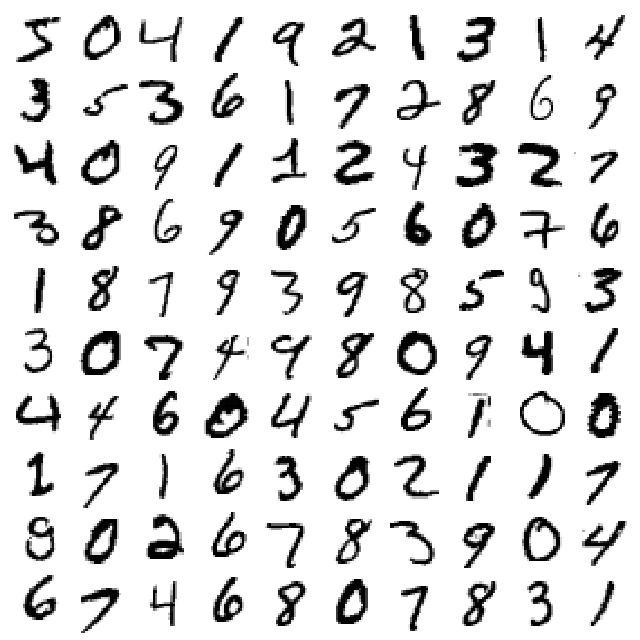

In [17]:
plt.figure(figsize=(9, 9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig('more_digits_plot')
plt.show()

In [18]:
for row in np.arange(10):
  print(y[row * 10:(row + 1) * 10])

['5' '0' '4' '1' '9' '2' '1' '3' '1' '4']
['3' '5' '3' '6' '1' '7' '2' '8' '6' '9']
['4' '0' '9' '1' '1' '2' '4' '3' '2' '7']
['3' '8' '6' '9' '0' '5' '6' '0' '7' '6']
['1' '8' '7' '9' '3' '9' '8' '5' '9' '3']
['3' '0' '7' '4' '9' '8' '0' '9' '4' '1']
['4' '4' '6' '0' '4' '5' '6' '1' '0' '0']
['1' '7' '1' '6' '3' '0' '2' '1' '1' '7']
['9' '0' '2' '6' '7' '8' '3' '9' '0' '4']
['6' '7' '4' '6' '8' '0' '7' '8' '3' '1']


In [22]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Binary Classification

In [23]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [24]:
from sklearn.linear_model import SGDClassifier
from datetime import datetime

start = datetime.now()

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42, n_jobs=-1)
sgd_clf.fit(X_train, y_train_5)

print(datetime.now() - start)

0:00:19.426416


In [25]:
sgd_clf.predict([some_digit])

array([ True])

In [27]:
from sklearn.model_selection import cross_val_score

start = datetime.now()

cv_scores = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy', n_jobs=3)

print(datetime.now() - start)

0:00:16.335822


In [28]:
cv_scores

array([0.95035, 0.96035, 0.9604 ])

In [31]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

start = datetime.now()

for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]
  
  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))
  
print(datetime.now() - start)

0.95035
0.96035
0.9604
0:00:23.518388


In [32]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    pass
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [35]:
never_5_clf = Never5Classifier()

start = datetime.now()

cv_scores = cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy', n_jobs=-1)

print(cv_scores)

print(datetime.now() - start)

[0.91125 0.90855 0.90915]
0:00:04.360739


In [49]:
from sklearn.model_selection import cross_val_predict

start = datetime.now()

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, n_jobs=-1)

print(datetime.now() - start)

0:00:25.356888


In [52]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)


array([[53892,   687],
       [ 1891,  3530]])

In [53]:
confusion_matrix(y_train_5, y_train_5)

array([[54579,     0],
       [    0,  5421]])

In [54]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [55]:
3530 / (3530 + 687)

0.8370879772350012

In [56]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [57]:
3530 / (3530 + 1891)

0.6511713705958311

In [58]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [60]:
3530 / (3530 + (687 + 1891) / 2)

0.7325171197343847

In [70]:
y_scores = sgd_clf.decision_function(X_train)
y_scores

array([  2164.22030239,  -5897.37359354, -13489.14805779, ...,
         6007.43513003,   -695.89564908,  -3991.49590678])

In [71]:
threshold = 0 
y_pred_thres_0 = (y_scores > threshold)
y_pred_thres_0

array([ True, False, False, ...,  True, False, False])

In [74]:
threshold = 1000
y_pred_thres_1000 = (y_scores > threshold)
y_pred_thres_1000

array([ True, False, False, ...,  True, False, False])

In [67]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [86]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [87]:
idx = np.where((thresholds > 6999.5) & (thresholds < 7001))[0]
precisions[idx], recalls[idx], thresholds[idx]

(array([0.9309052]), array([0.32060505]), array([6999.78674479]))

Saving figure precision_recall_vs_threshold_plot


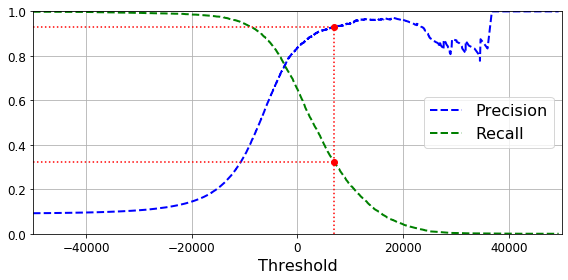

In [88]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label='Precision', linewidth=2)
  plt.plot(thresholds, recalls[:-1], 'g--', label='Recall', linewidth=2)
  plt.legend(loc='center right', fontsize=16)
  plt.xlabel('Threshold', fontsize=16)
  plt.grid(True)
  plt.axis([-50000, 50000, 0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([thresholds[idx], thresholds[idx]], [0, precisions[idx]], 'r:')
plt.plot([-50000, thresholds[idx]], [precisions[idx], precisions[idx]], 'r:')
plt.plot([-50000, thresholds[idx]], [recalls[idx], recalls[idx]], 'r:')
plt.plot([thresholds[idx]], [precisions[idx]], 'ro')
plt.plot([thresholds[idx]], [recalls[idx]], 'ro')
save_fig('precision_recall_vs_threshold_plot')
plt.show()

In [85]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, n_jobs=-1)
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, n_jobs=-1, method="decision_function")
(y_train_pred == (y_scores > 0)).all()

True

Saving figure precision_vs_recall_plot


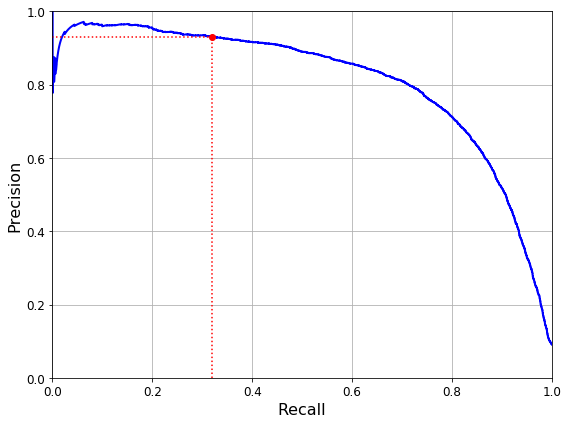

In [89]:
def plot_precision_vs_recall(precisions, recalls):
  plt.plot(recalls, precisions, 'b-', linewidth=2)
  plt.xlabel('Recall', fontsize=16)
  plt.ylabel('Precision', fontsize=16)
  plt.axis([0, 1, 0, 1])
  plt.grid(True)
  
plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recalls[idx], recalls[idx]], [0, precisions[idx]], 'r:')
plt.plot([0, recalls[idx]], [precisions[idx], precisions[idx]], 'r:')
plt.plot([recalls[idx]], [precisions[idx]], 'ro')
save_fig('precision_vs_recall_plot')
plt.show()

In [90]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]
threshold_90_precision

3370.0194991439557

In [91]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [92]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [93]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [94]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

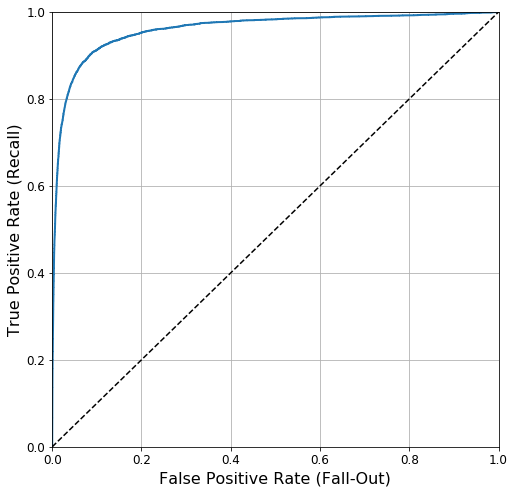

In [98]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.axis([0, 1, 0, 1])
  plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16)
  plt.ylabel('True Positive Rate (Recall)', fontsize=16)
  plt.grid(True)
  
plt.figure(figsize=(8, 8))
plot_roc_curve(fpr, tpr)
plt.show()

In [99]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [102]:
from sklearn.ensemble import RandomForestClassifier

start = datetime.now()

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba', n_jobs=-1)

print(datetime.now() - start)

0:01:43.116043


In [103]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

Saving figure roc_curve_comparison_plot


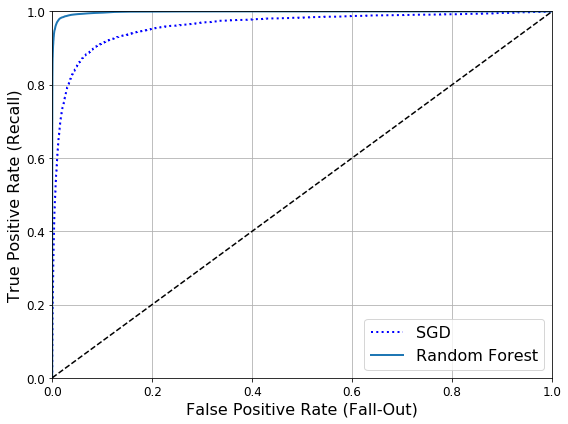

In [104]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, 'b:', linewidth=2, label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.grid(True)
plt.legend(loc='lower right', fontsize=16)
save_fig('roc_curve_comparison_plot')
plt.show()

In [105]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

In [119]:
start = datetime.now()
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
print(datetime.now() - start)
precision_score(y_train_5, y_train_pred_forest)

0:01:42.349539


0.9905083315756169

In [120]:
start = datetime.now()
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, n_jobs=-1)
print(datetime.now() - start)
precision_score(y_train_5, y_train_pred_forest)

0:01:00.701745


0.9905083315756169

In [108]:
recall_score(y_train_5, y_train_pred_forest)

0.8662608374838591

In [109]:
f1_score(y_train_5, y_train_pred_forest)

0.9242275142688446

# Multiclass Classification

In [122]:
from sklearn.svm import SVC
start = datetime.now()
svm_clf = SVC(gamma='auto', random_state=42)
svm_clf.fit(X_train[:1000], y_train[:1000])
print(datetime.now() - start)
svm_clf.predict([some_digit])

0:00:01.823205


array([5], dtype=uint8)

In [111]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243]])

In [112]:
np.argmax(some_digit_scores)

5

In [113]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [114]:
svm_clf.classes_[5]

5

In [123]:
from sklearn.multiclass import OneVsRestClassifier
start = datetime.now()
ovr_clf = OneVsRestClassifier(SVC(gamma='auto', random_state=42))
ovr_clf.fit(X_train[:1000], y_train[:1000])
print(datetime.now() - start)
ovr_clf.predict([some_digit])

0:00:09.450878


array([5], dtype=uint8)

In [116]:
len(ovr_clf.estimators_)

10

In [121]:
start = datetime.now()
sgd_clf.fit(X_train, y_train)
print(datetime.now() - start)
sgd_clf.predict([some_digit])

0:01:10.713115


array([3], dtype=uint8)

In [118]:
sgd_clf.decision_function([some_digit])

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [125]:
start = datetime.now()
cv_scores = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print(datetime.now() - start)
cv_scores

0:01:50.831641


array([0.87082583, 0.87089354, 0.88628294])

In [127]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
start = datetime.now()
cv_scores = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy', n_jobs=-1)
print(datetime.now() - start)
cv_scores

0:04:56.454533


array([0.89957009, 0.89344467, 0.89963495])

In [128]:
start = datetime.now()
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3, n_jobs=-1)
print(datetime.now() - start)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

0:04:46.670304


array([[5576,    0,   21,    6,    9,   43,   37,    6,  224,    1],
       [   0, 6398,   38,   23,    4,   44,    4,    8,  213,   10],
       [  26,   27, 5242,   90,   71,   26,   62,   36,  371,    7],
       [  24,   17,  117, 5220,    2,  208,   28,   40,  405,   70],
       [  12,   14,   48,   10, 5192,   10,   36,   26,  330,  164],
       [  28,   15,   33,  166,   55, 4437,   76,   14,  538,   59],
       [  30,   14,   41,    2,   43,   95, 5560,    4,  128,    1],
       [  21,    9,   52,   27,   51,   12,    3, 5693,  188,  209],
       [  17,   63,   46,   90,    3,  125,   25,   10, 5429,   43],
       [  23,   18,   31,   66,  116,   32,    1,  179,  377, 5106]])

In [129]:
def plot_confusion_matrix(matrix):
  fig = plt.figure(figsize=(8, 8))
  ax = fig.add_subplot(111)
  cax = ax.matshow(matrix)
  fig.colorbar(cax)

Saving figure confusion_matrix_plot


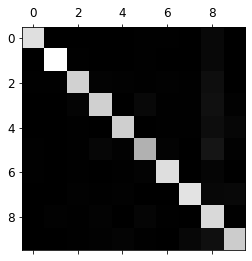

In [130]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig('confusion_matrix_plot', tight_layout=False)
plt.show()

In [131]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

Saving figure confusion_matrix_errors_plot


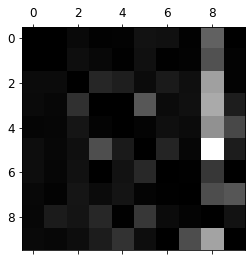

In [132]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig('confusion_matrix_errors_plot', tight_layout=False)
plt.show()

# Multilabel Classification

In [25]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

start = datetime.now()
knn_clf = KNeighborsClassifier(n_jobs=-1)
print(knn_clf.fit(X_train, y_multilabel))
print(datetime.now() - start)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
0:00:46.378659


In [24]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [ ]:
from sklearn.model_selection import cross_val_predict

start = datetime.now()
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
print(datetime.now() - start)
y_train_knn_pred

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_multilabel, y_train_knn_pred, average='macro')

# Multioutput Classification

In [ ]:
X_train_e = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + X_train_e
X_test_e = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + X_test_e

In [ ]:
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig('noisy_digit_example_plot')
plt.show()